# <center> HW2 - Linear Discriminant Analysis, Perception Classification <center>

In [45]:
from sklearn import datasets
import matplotlib.pyplot as plt

X, y, centers = datasets.make_blobs(n_samples = 400, n_features = 4,
    centers=4, cluster_std = 2, random_state=100, return_centers=True)
centers # this 

array([[ 0.86809884, -4.4326123 , -1.50964819,  6.89552265],
       [-9.90562288, -7.56861758,  3.41498169,  6.5170551 ],
       [-7.26586821,  1.50186659,  7.82643909, -5.81595756],
       [-6.29343561, -7.83246219, -5.60605015,  9.57247569]])

As we can see above, each array represents one of our blobs and each column represents a feature and its center

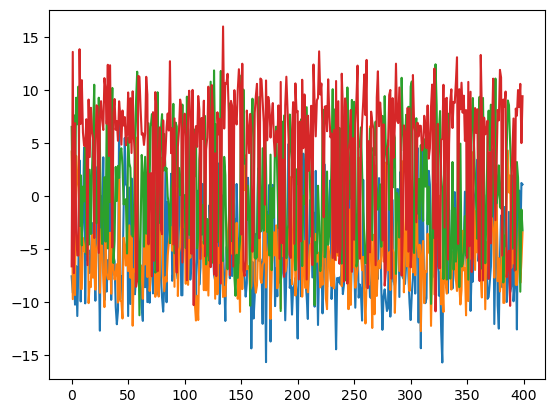

In [46]:
plt.plot(X)

a. [20 pts] Modify the within-class (Sw) and between-class (SB) functions in the lecture
 note to calculate the scatter matrices.

In [47]:
import numpy as np

mean_vectors = []
for cl in range(0,4):
    mean_vectors.append(np.mean(X[y==cl], axis = 0))
    Overall_Mean = np.mean(X, axis = 0)


mean_vectors

[array([ 0.82744825, -4.59819208, -1.45809237,  6.99189147]),
 array([-9.87038197, -7.71058888,  3.46678297,  6.29065458]),
 array([-7.22645471,  1.66250747,  7.72800594, -5.9162825 ]),
 array([-5.69657185, -7.85882945, -5.54778158,  9.74113663])]

In [48]:
SW = np.zeros((4,4))
for cl, mv in zip(range(0,4),mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for x_ in X[y==cl]:
        x_, mv = x_.reshape(4,1), mv.reshape(4,1)
        class_sc_mat += (x_-mv).dot((x_-mv).T)
    SW += class_sc_mat

SW

array([[1750.98152406,  106.48932315,  198.55647822, -169.76805166],
       [ 106.48932315, 1723.81488361,   41.4319164 ,  133.18995014],
       [ 198.55647822,   41.4319164 , 1636.0479396 , -122.4631805 ],
       [-169.76805166,  133.18995014, -122.4631805 , 1638.32393169]])

Above, we can see that Sw is a symmetric 4x4 matrix.

In [49]:
SB = np.zeros((4,4))
for i, mean_vec in enumerate(mean_vectors):
    n = X[y==i, :].shape[0]
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = Overall_Mean.reshape(4,1)
    SB += n*(mean_vec-overall_mean).dot((mean_vec - overall_mean).T)

SB


array([[  6215.58365775,    343.5454076 ,  -3666.43317823,
          2490.20459148],
       [   343.5454076 ,   5951.19739909,   5579.96630527,
         -8790.09561851],
       [ -3666.43317823,   5579.96630527,  10025.78216681,
        -10606.46152794],
       [  2490.20459148,  -8790.09561851, -10606.46152794,
         14518.52376827]])

 b. [5 pts] Reduce the dimensions to 2-D by finding the eigenvalues, λ, and their corresponding
 eigenvectors using SB and Sw matrices found in a). Projectile points and visualize the result.

In [58]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(SW).dot(SB))
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)


for i in eigen_pairs:
    print("Eigenvalue:" + str(i[0]) +"\n", "Corresponding eigenvector: " + str(i[1]) + "\n")


Eigenvalue: 18.329565866100403
 Corresponding eigenvector: [-0.31698395  0.41568254  0.50429659 -0.6873239 ]

Eigenvalue: 4.015495496672319
 Corresponding eigenvector: [ 0.80880986  0.42457667 -0.32741828 -0.24157511]

Eigenvalue: 0.7489231082280354
 Corresponding eigenvector: [-0.42438995  0.24315086 -0.78687792 -0.37628973]

Eigenvalue: 3.935718606899028e-16
 Corresponding eigenvector: [-0.2104599   0.77266688  0.11483868  0.5877964 ]



Note that our smallest value in the list of eigenvalues is very very small, 

In [51]:
eigenvalues_sum = sum(eigenvalues)
for i, j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format (i+1, (j[0]/eigenvalues_sum).real))

Eigenvalue 1:  79.37%
Eigenvalue 2:  17.39%
Eigenvalue 3:  3.24%
Eigenvalue 4:  0.00%
